In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Phishing_Email - Phishing_Email.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18607 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df["Email Type"].value_counts()

,count
Email Type,
Safe Email,11322
Phishing Email,7328


In [ ]:
df.drop(columns = ["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18607 non-null  object
 1   Email Type  18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [ ]:
df.duplicated().sum()

np.int64(1220)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
Email Text,2
Email Type,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17428 entries, 0 to 18648
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17428 non-null  object
 1   Email Type  17428 non-null  object
dtypes: object(2)
memory usage: 408.5+ KB


In [ ]:
Email={"Safe Email":1, "Phishing Email":0 }
df["Email Type"]=df["Email Type"].map(Email)

In [ ]:
Email

{'Safe Email': 1, 'Phishing Email': 0}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y=df["Email Type"]
x=df["Email Text"]

In [ ]:
x

,Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...
3,\nHello I am your hot lil horny toy.\n I am...
4,software at incredibly low prices ( 86 % lower...
...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...
18645,date a lonely housewife always wanted to date ...
18646,request submitted : access request for anita ....
18647,"re : important - prc mtg hi dorn & john , as y..."


In [ ]:
y

,Email Type
0,1
1,1
2,1
3,0
4,0
...,...
18644,1
18645,0
18646,1
18647,1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
x_train

,Email Text
3901,re : red rock posting - - urgent as i discusse...
16539,I'm configuring this at the moment. -> Still ;...
17329,tw options pre - filing meetings with ferc tod...
9518,you will be favoured to claim this inheritance...
1597,"re : fw : ssmb lawyer ' s request louise , tha..."
...,...
11971,"mcdonough herald - comparison exposing c * e ,..."
12716,"\nHello, \nPremium Phone Qualified \nBusiness ..."
5654,\n... and say hello to the cool: Oooo ... /th...
889,fw : - - - - - original message - - - - - from...


In [ ]:
x_train.shape

(13942,)

In [ ]:
x_test.shape

(3486,)

# **Random Forest Classifier**

In [ ]:
model = Pipeline([
   ('tfidfvectorizer',TfidfVectorizer()),
    ('RandomForestClassifier',RandomForestClassifier())
])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
score = accuracy_score(y_test,y_pred)
score

0.96815834767642

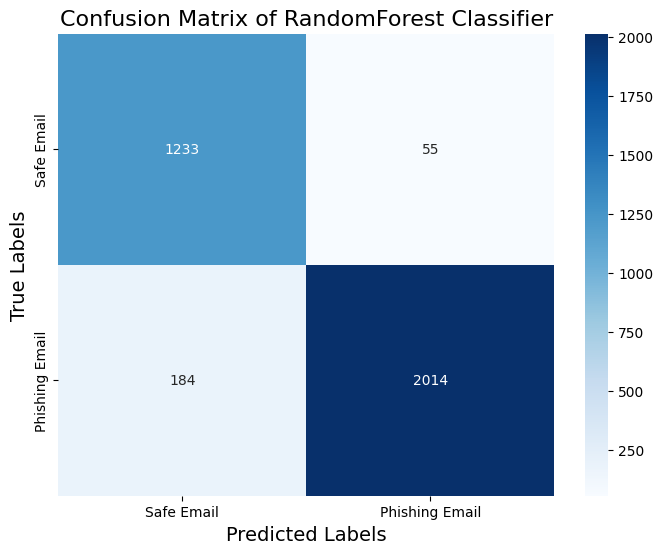

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd', cmap='Blues', xticklabels=Email, yticklabels=Email)
plt.title("Confusion Matrix of RandomForest Classifier", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

# **SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = Pipeline([
   ('tfidfvectorizer',TfidfVectorizer()),
    ('SVC',SVC())
])
model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('SVC', SVC())])

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9827882960413081

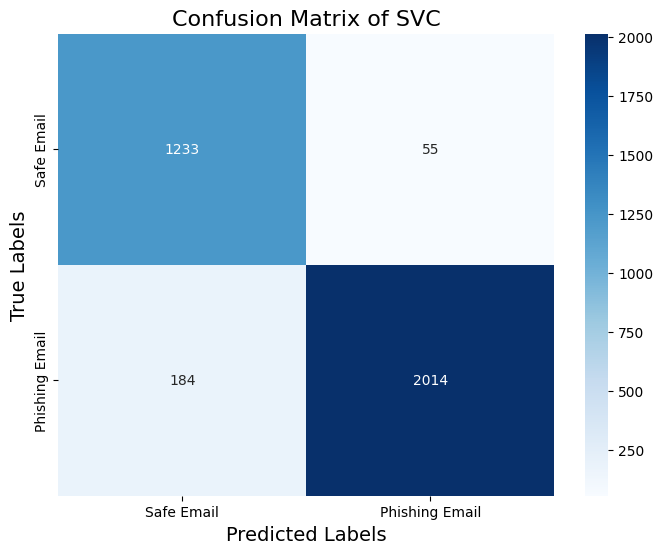

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd', cmap='Blues', xticklabels=Email, yticklabels=Email)
plt.title("Confusion Matrix of SVC", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = Pipeline([
('tfidfvectorizer',TfidfVectorizer()),
('DecisionTreeClassifier',DecisionTreeClassifier())
])

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9314400458978772

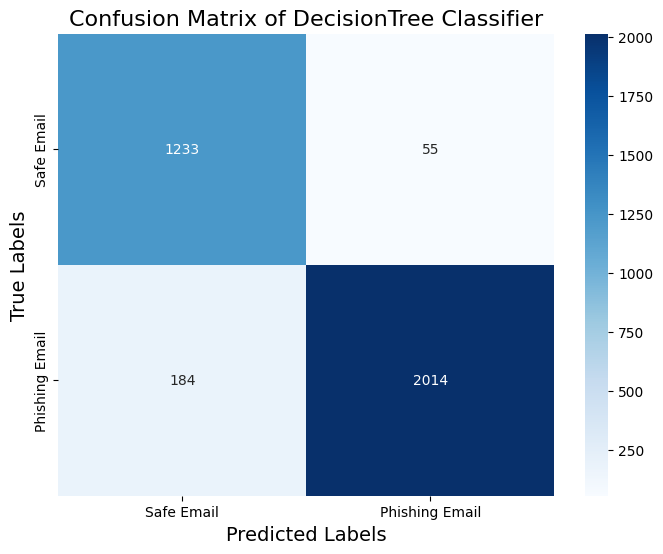

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd', cmap='Blues', xticklabels=Email, yticklabels=Email)
plt.title("Confusion Matrix of DecisionTree Classifier", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

# **Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = Pipeline([
('tfidfvectorizer',TfidfVectorizer()),
('logisticregression', LogisticRegression(max_iter=1000))
])

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9759036144578314

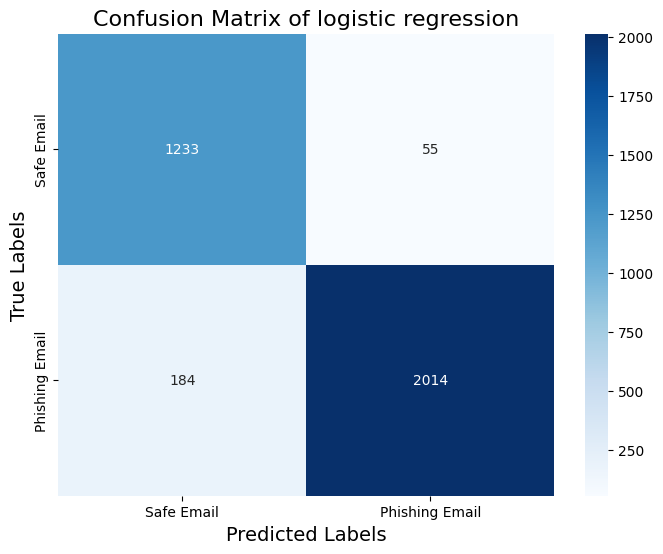

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd', cmap='Blues', xticklabels=Email, yticklabels=Email)
plt.title("Confusion Matrix of logistic regression", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = Pipeline([
('tfidfvectorizer',TfidfVectorizer()),
('knn', KNeighborsClassifier(n_neighbors=5))
])

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('knn', KNeighborsClassifier())])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9314400458978772

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
matrix= confusion_matrix(y_test,y_pred)
matrix

array([[1233,   55],
       [ 184, 2014]])

In [ ]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9314400458978772

In [ ]:
precision= precision_score(y_test,y_pred)
precision

0.9734171097148381

In [ ]:
recall= recall_score(y_test,y_pred)
recall

0.916287534121929

In [ ]:
f1= f1_score(y_test,y_pred)
f1

0.9439887508788376

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report= classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1288
           1       0.97      0.92      0.94      2198

    accuracy                           0.93      3486
   macro avg       0.92      0.94      0.93      3486
weighted avg       0.94      0.93      0.93      3486



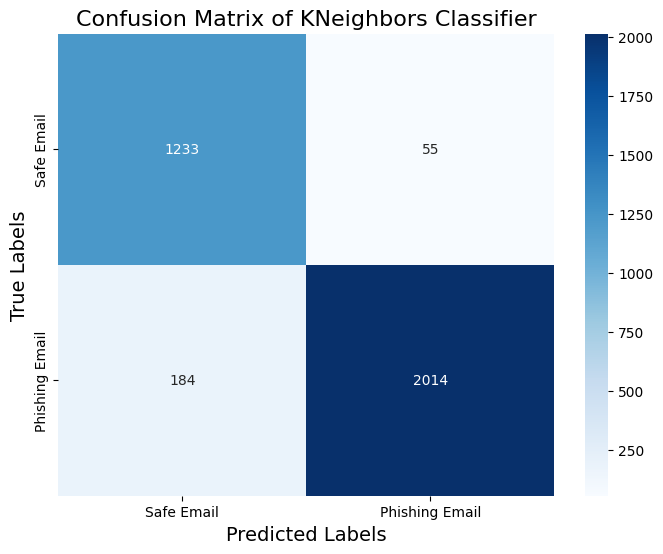

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd', cmap='Blues', xticklabels=Email, yticklabels=Email)
plt.title("Confusion Matrix of KNeighbors Classifier", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

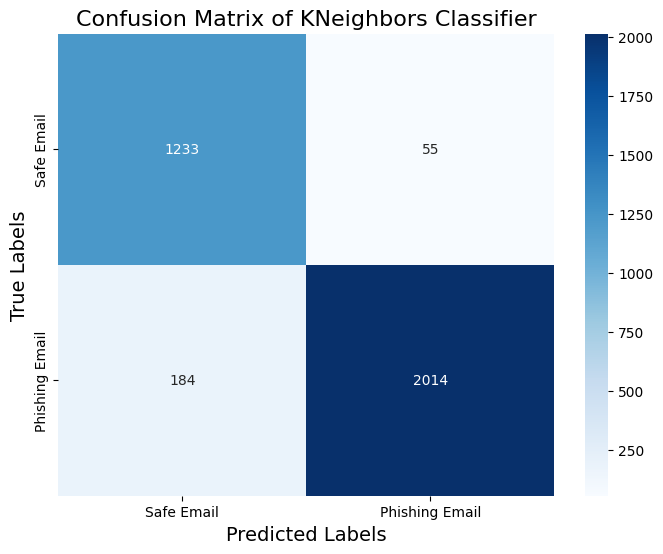

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))

# Correct colormap and use proper Email labels for xticks and yticks
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=Email, yticklabels=Email)

# Fix typo in title
plt.title("Confusion Matrix of KNeighbors Classifier", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

In [ ]:
test1= ['''We have detected suspicious activity on your account. To ensure that your account is secure, we require you to verify your identity immediately.

Please click the link below to confirm your details and secure your account:

Verify Your Account Now

Failure to verify your account within 24 hours may result in a temporary suspension of your account. This is a security measure to protect your personal information.

If you did not attempt to access your account recently, please contact our support team immediately.

Thank you for your prompt attention to this matter.

Sincerely,
Customer Support Team
[Fake Company Name]
Contact Us: support@fakecompany.com''']

x=model.predict(test1)
x

array([0])

In [ ]:
Email

{'Safe Email': 1, 'Phishing Email': 0}